In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.pandas.set_option('display.max_column',None)

In [5]:
df = pd.read_csv('clean_df.csv')
df.head()


,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1


**Categorical Variables**

Creating dummy variables

To prevent Dummy Variable Trap, multi-collinearity, create one less dummy variables from the number of categories in the variable. The remaning category will be respesented when the rest is 0.


In [16]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [15]:
#Without drop_first, get_dummies() will create for all categories.
dummy = pd.get_dummies(df['body-style'],drop_first=True)
dummy

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
196,0,0,1,0
197,0,0,1,0
198,0,0,1,0
199,0,0,1,0


Some categorical variables can occur too rare and while sampling this category can have all zeros, zero-variance predictor. This can cause a problem so, remove the category or combine it with the others.(hashing is one option)

In [17]:
dummy.value_counts()

hardtop  hatchback  sedan  wagon
0        0          1      0        94
         1          0      0        68
         0          0      1        25
1        0          0      0         8
0        0          0      0         6
dtype: int64

In [24]:
#To discard a category we can determine a threshold
#There are 8 hardtoped cars and the ratio is:
(dummy.values.sum()-8)/8
#Usally, cutoff around 19 is enough.

23.375

For ordered categorical data, incremental encoding can be used

In [29]:
df['horsepower-binned'].head()

0       Low
1       Low
2    Medium
3       Low
4       Low
Name: horsepower-binned, dtype: object

In [30]:
df['horsepower-binned'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [31]:
mapping = {'Low':1,'Medium':2,'High':3}
df['horsepower-binned'].map(mapping)

0      1
1      1
2      2
3      1
4      1
      ..
196    1
197    2
198    2
199    1
200    1
Name: horsepower-binned, Length: 201, dtype: int64

**Numerical Variables**

Continuous variables are subject to potential issues in some models.

Models that construct relationships between the predictors and the response that are
based on the rank of the predictor values rather than the actual value, like trees, are
immune to predictor distributions that are skewed or to individual samples that have unusual values (i.e., outliers).

Other models such as K -nearest neighbors and support vector machines are much more sensitive to predictors with skewed distributions or outliers.

Continuous predictors that are highly correlated with each other is another
regularly occurring scenario that presents a problem for some models. While partial least squares method is built to over come this issue, linear regression and neural networks are adversely affacted

Commonly occuring problems with continuous variables:
1- Be on vastly different scales: 
2- Skewed distribution 
3- Outliers
4- Censored data
5- Can be a good predictive but also very complex. So hard to represent in a model
6- Can contain relevant and redundant information at the same time.

Binning can also be used to simplify the data.

Box-Cox Transofrmation -> for positive data
Power Transfrom (Yeo and Johnson) -> no need to be positive
Log Transformation
Logit Transform -> for variables in range of 0 and 1
Arcsine Transformation -> logit alternative
Standardization -> scaling
Min-Max scaling -> scaling

(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

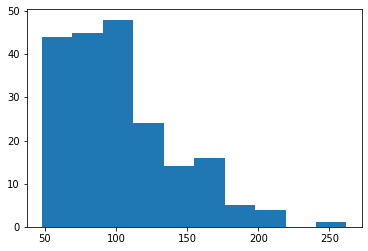

In [43]:
#log transofrmation
plt.hist(df['horsepower'])

(array([ 6.,  9., 48., 32., 42., 24., 18., 17.,  4.,  1.]),
 array([3.87120101, 4.04091536, 4.21062971, 4.38034406, 4.55005841,
        4.71977276, 4.88948711, 5.05920146, 5.22891581, 5.39863015,
        5.5683445 ]),
 <BarContainer object of 10 artists>)

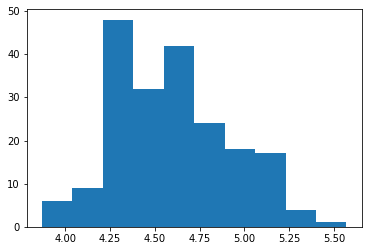

In [56]:
a = df['horsepower']
a= np.log(a)
plt.hist(a)

2.562902902617277e-15
1.0


(array([ 6.,  9., 48., 32., 42., 24., 18., 17.,  4.,  1.]),
 array([-2.10806666, -1.60348769, -1.09890872, -0.59432974, -0.08975077,
         0.4148282 ,  0.91940717,  1.42398614,  1.92856511,  2.43314408,
         2.93772306]),
 <BarContainer object of 10 artists>)

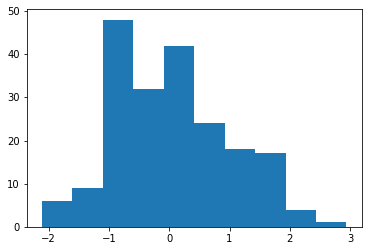

In [57]:
#Standardization
b = (a-a.mean())/a.std()
print(b.mean())
print(b.std())
plt.hist(b)

(array([ 6.,  9., 48., 32., 42., 24., 18., 17.,  4.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

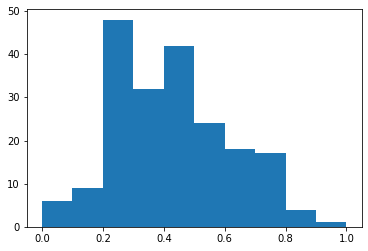

In [59]:
#Min-Max scaling
b = (a-min(a))/(max(a)-min(a))
plt.hist(b)

**Many to many transformations** can help recting a variety of issues such as outliers or collinearity. They can also reduce the dimensionality of the predictor space.

Dimension reduction is not feature selection!

Methods: 
1- Principal component analysis (Unsupervised)
2- kernel PCA (Unsupervised)
3- Independent component analysis (Unsupervised)
4- Non-negative matrix factorization (Unsupervised)
5- Partial least squares (Supervised)


PCA

Feauter scaling before application is important.

In [69]:
from sklearn.decomposition import PCA

In [103]:
a = [f for f in df.columns if df[f].dtypes != 'object']
num_data = df[a].copy()
num_data.pop('Unnamed: 0')
num_data.pop('symboling')
num_data.pop('price')
num_data = (num_data-num_data.mean())/num_data.std()
num_data['stroke'] = num_data['stroke'].fillna(value=num_data['stroke'].mean())
num_data.shape

(201, 17)

In [104]:
#full pca
pca = PCA(n_components=17).fit(num_data)

In [109]:
foo = pca.transform(num_data)
np.cumsum(pca.explained_variance_ratio_*100)
#First 8 principle component explains more than %95 of the varince in the data

array([ 43.98817501,  68.39381231,  77.43627314,  82.74783069,
        87.68170931,  91.46044237,  93.98098638,  95.8782399 ,
        97.57843631,  98.26818943,  98.84747441,  99.26458516,
        99.57707487,  99.84188435,  99.9355886 , 100.        ,
       100.        ])

Text(0, 0.5, 'Variance')

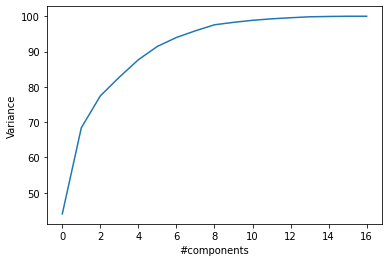

In [110]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('#components')
plt.ylabel('Variance')

In [111]:
pca = PCA(n_components=8).fit(num_data)
np.cumsum(pca.explained_variance_ratio_*100)

array([43.98817501, 68.39381231, 77.43627314, 82.74783069, 87.68170931,
       91.46044237, 93.98098638, 95.8782399 ])

In [112]:
transformed_data = pca.transform(num_data)
transformed_data

array([[-0.43179943, -1.81835673,  0.52950382, ...,  0.55714685,
         0.2219313 , -0.76899933],
       [-0.43179943, -1.81835673,  0.52950382, ...,  0.55714685,
         0.2219313 , -0.76899933],
       [ 0.62384462, -1.28688644,  1.21325522, ...,  0.3759654 ,
         2.22892827, -1.46830504],
       ...,
       [ 3.4871483 , -0.62452194, -1.52459597, ...,  0.85846812,
         0.37380258,  0.76546364],
       [ 1.90138374,  5.43603394,  1.04429314, ...,  1.33114182,
         1.30669778, -0.45911249],
       [ 3.13865165, -0.15531974, -1.49808457, ...,  0.53674065,
        -0.80828351,  0.73953366]])

In [132]:
columns = np.char.array(['PC']) + np.arange(1,9).astype('str')

pd.DataFrame(transformed_data,columns=columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.43,-1.82,0.53,2.56,-0.85,0.56,0.22,-0.77
1,-0.43,-1.82,0.53,2.56,-0.85,0.56,0.22,-0.77
2,0.62,-1.29,1.21,-0.93,-0.43,0.38,2.23,-1.47
3,-0.17,-0.66,0.65,-0.74,1.28,-0.48,-0.28,0.04
4,1.57,-1.48,0.85,-0.67,1.15,-0.10,0.09,-0.90
...,...,...,...,...,...,...,...,...
196,2.45,0.18,-1.58,-0.24,0.29,0.28,-0.82,1.41
197,3.50,-0.39,-1.36,-0.06,0.08,0.66,-0.58,0.84
198,3.49,-0.62,-1.52,0.23,0.69,0.86,0.37,0.77
199,1.90,5.44,1.04,-0.36,1.01,1.33,1.31,-0.46


**Missing Values**

Some models can tolerate missing values.

Encoding Categorical Variables: NaN -> 'Missing'

    Should consider the effect of the predictor to the response.
    
Imputation:
    
    Depends on the data but if the pencent of missing value in a column is less than %20.
    
    Methods: 
        K-Nearest -> When data is small, sensitive to outliers
        Trees
        Linear Models
        Mean/Median -> No uncertainty, not accounting the correlatin between variables.
        Mode -> can introduce bias, not accounting the correlatin between variables.
    
    


In [133]:
from sklearn.impute import KNNImputer


In [136]:
a = [f for f in df.columns if df[f].dtypes != 'object']
num_data = df[a].copy()
num_data.isna().sum()

Unnamed: 0           0
symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
fuel-type-diesel     0
fuel-type-gas        0
dtype: int64

In [145]:
imputer = KNNImputer(n_neighbors=5)
foo = pd.DataFrame(imputer.fit_transform(num_data),columns = num_data.columns)

In [153]:
num_data[num_data['stroke'].isna()]['stroke']

52   NaN
53   NaN
54   NaN
55   NaN
Name: stroke, dtype: float64

In [154]:
foo[num_data['stroke'].isna()]['stroke']

52   3.44
53   3.30
54   3.24
55   2.90
Name: stroke, dtype: float64